In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import matplotlib
import thinkstats2
import thinkplot

In [6]:
resp = nsfg.ReadFemResp()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
5,845,1,5,4,1,5.0,42,42,727,42,...,0,2335.279149,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000
6,10333,5,5,3,1,5.0,17,17,1029,17,...,0,2335.279149,2687.399758,3139.151658,2,18,1236,1224,14:14:38,61.204333
7,855,5,5,4,5,5.0,22,22,965,22,...,0,4670.558298,7122.614751,10019.382170,2,18,1235,1223,14:42:52,59.756333
8,8656,5,5,4,1,5.0,38,38,780,38,...,0,5198.652195,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833
9,3566,5,5,4,5,5.0,21,21,974,21,...,0,2764.142038,3240.986558,4559.095792,2,18,1231,1219,16:22:25,104.744667


In [38]:
timesmar = resp["timesmar"]
jintendn = resp["jintendn"]
c_timesmar = timesmar.dropna(axis=0, how="any")
c_jintendn =jintendn.dropna(axis=0, how="any")

In [72]:
tmean, tstd = c_timesmar.mean(), c_timesmar.std()
tmean, tstd

(1.3870576829859429, 4.2971130232530834)

In [73]:
jmean, jstd = c_jintendn.mean(), c_jintendn.std()
jmean, jstd

(2.7052556818181817, 9.710108051456988)

In [74]:
pdft = thinkstats2.NormalPdf(tmean, tstd)
pdft.Density(tmean + tstd)


0.056310067529003929

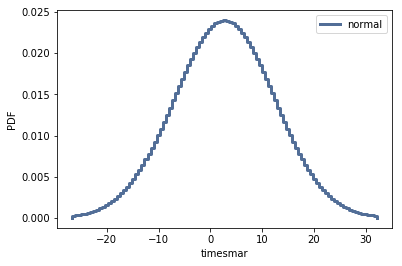

In [78]:
pmft = pdf.MakePmf()
thinkplot.Pmf(pmft, label='normal')
thinkplot.Config(xlabel='timesmar', ylabel='PDF')



In [79]:
pdfj = thinkstats2.NormalPdf(jmean, jstd)
pdfj.Density(jmean + jstd)

0.024919467758428907

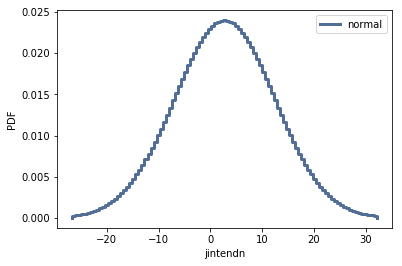

In [80]:
pmfj= pdf.MakePmf()
thinkplot.Pmf(pmfj, label='normal')
thinkplot.Config(xlabel='jintendn', ylabel='PDF')

Those are the PDF's that represents the distribution of the given columns.

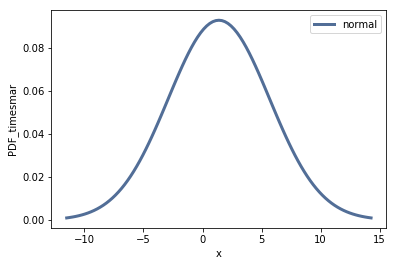

In [81]:
thinkplot.Pdf(pdft, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF_timesmar')

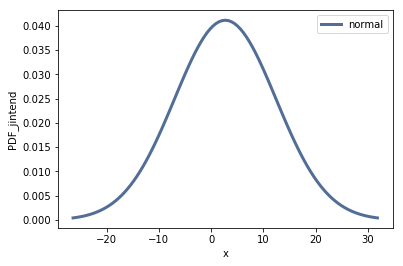

In [82]:
thinkplot.Pdf(pdfj, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF_jintendn')

In [89]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(c_timesmar), Skewness(c_jintendn)


(22.219307220678285, 9.6869140579335831)

In [91]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

PearsonMedianSkewness(c_timesmar), PearsonMedianSkewness(c_jintendn)

(0.27025442021022084, 0.52703684297200826)

Because skewness is based on third moment, it is affected by outliers. Pearson median skewness is more robust to outlier
and it indicates that both distributions are a little skewed to right since skewness is positive.

In [153]:
s_timesmar = c_timesmar[1:1400]
s_jintendn = c_jintendn[1:1400]


In [154]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

s_timesmar = Jitter(s_timesmar)
s_jintendn = Jitter(s_jintendn)

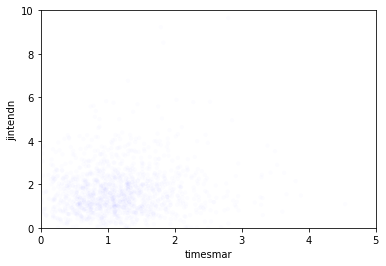

In [158]:
thinkplot.Scatter(s_timesmar, s_jintendn, alpha=0.01,s=20)
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[0, 5, 0, 10],
                 legend=False)

s is intentionally set to 20 othwerwise data points are not visible

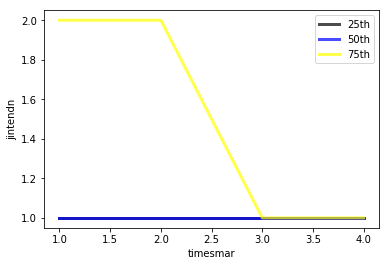

In [176]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

bins = np.arange(0, 100, 0.1)

indices = np.digitize(cleaned.timesmar, bins)

groups = cleaned.groupby(indices)

    
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]


CustomColors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 legend=True)



The 25th and 50th percentiles are same for all gruops but 75th percentile is 2 for timesmar < 2

In [190]:
import scipy.stats

coefficient, p_value = scipy.stats.pearsonr(c_timesmar[2001:3400], c_jintendn[1:1400])
coefficient


-0.0024128039112370032

In [191]:
coefficient1, p_value1 = scipy.stats.spearmanr(c_timesmar[2001:3400], c_jintendn[1:1400])
coefficient1


-0.0076791346451567967

Normally spearmans rank correlation is more robust to outliers compared to pearsons correlation. But in our case both results are so close to zero meaning that there is no linear relationship between two variables.

According to pdfs and correlation coefficients above, two variables timesmar and jintendn are not directly related to each ohter. 